# The lowest spatial mismatches for each simulation in the CCE catalog

In [2]:
import matplotlib.pyplot as plt
import pickle
from qnmfits.spatial_mapping_functions import *
from matplotlib.lines import Line2D

plt.style.use("stylesheet.mplstyle")
fig_width = 246.0 * (1.0 / 72.27)
fig_height = 2.55

In [3]:
simnums = [
    "0001",
    "0002",
    "0003",
    "0004",
    "0005",
    "0006",
    "0007",
    "0008",
    "0009",
    "0010",
    "0011",
    "0012",
    "0013",
]

sim_main_option = "_Lev5_R2"
sim_options = [("Lev4", "R2"), ("Lev4", "R3"), ("Lev5", "R2"), ("Lev5", "R3")]

In [4]:
with open("sim_mismatches_new.pickle", "rb") as file:
    sim_mismatches = pickle.load(file)

In [5]:
sorted_simnums = simnums

markers = {
    "(2, 0, 0, 1)": "P",
    "(2, 1, 0, 1)": "X",
    "(2, 2, 0, 1)": "o",
    "(3, 2, 0, 1)": "^",
    "(3, 3, 0, 1)": "v",
    "(4, 4, 0, 1)": "s",
    "(5, 5, 0, 1)": "p",
    "(6, 6, 0, 1)": "<",
}

colors = plt.cm.get_cmap("viridis", len(markers))
colors_dict = {qnm: colors(i) for i, qnm in enumerate(markers.keys())}

/tmp/ipykernel_45383/1568076395.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("viridis", len(markers))


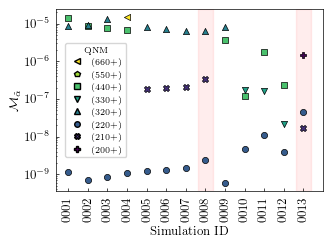

In [6]:
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

for i, simnum in enumerate(sorted_simnums):
    key = simnum + sim_main_option
    mismatch_data = sim_mismatches[key]
    sorted_keys = sorted(mismatch_data, key=mismatch_data.get)
    sorted_keys = [k for k in sorted_keys if mismatch_data[k] >= 1e-13]
    sorted_keys = [k for k in sorted_keys if k[3] != -1]

    if simnum == "0008" or simnum == "0013":
        ax.axvspan(
            sorted_simnums.index(simnum) - 0.4,
            sorted_simnums.index(simnum) + 0.4,
            color="red",
            alpha=0.07,
        )

    smallest_keys = sorted_keys[:3]

    for qnm in smallest_keys:
        mismatch = mismatch_data[qnm]
        ax.scatter(
            i,
            mismatch,
            color=colors_dict[f"{qnm}"],
            marker=markers[f"{qnm}"],
            edgecolor="black",
            linewidth=0.5,
            s=20,
        )

legend_elements = [
    Line2D(
        [0],
        [0],
        marker=marker,
        color="w",
        label=f"{qnm[0:2]}{qnm[4]}{qnm[7]}" + r"$+)$",
        markerfacecolor=colors_dict[f"{qnm}"],
        markersize=4,
        linewidth=0.01,
        markeredgecolor="black",
    )
    for qnm, marker in markers.items()
]
legend_elements.reverse()

ax.legend(
    handles=legend_elements,
    title="QNM",
    loc="center left",
    fontsize=6,
    title_fontsize=6,
    frameon=True,
    bbox_to_anchor=(0.02, 0.5),
)

ax.set_xticks(range(len(sorted_simnums)))
ax.set_xticklabels(sorted_simnums, rotation="vertical")

ax.set_yscale("log")

ax.set_xlabel("Simulation ID")
ax.set_ylabel(r"$\mathcal{M}_{\Tilde{\alpha}}$")
ax.tick_params(axis="both", which="major")

plt.show()

fig.savefig("figs/catalog_plot.pdf", dpi=600, bbox_inches="tight")